# Sprint 10 - Projeto

### Passo 1. Carregue os dados e prepare-os para a análise

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# carregando o arquivo e obtendo informações sobre o dataframe
df = pd.read_csv('/datasets/rest_data_us_upd.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [75]:
# primeiras 5 linhas
print(df.head())

      id          object_name                  address  chain object_type  \
0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN       2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20  
3      22  
4      20  


In [76]:
# verificando e tratando valores ausentes
print(f"\nValores ausentes por coluna:\n{df.isnull().sum()}")


Valores ausentes por coluna:
id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


In [77]:
# verificando duplicados
print(f"\nNúmero de linhas duplicadas: {df.duplicated().sum()}")




Número de linhas duplicadas: 0


In [78]:
# tratando duplicados
df = df.drop_duplicates().reset_index(drop=True)
print(f"Número de linhas duplicadas após a remoção: {df.duplicated().sum()}")


Número de linhas duplicadas após a remoção: 0


In [79]:
# preenchendo os 3 valores ausentes na coluna 'chain' com False
df['chain'].fillna(False, inplace=True)

# convertendo a coluna 'chain' para o tipo booleano (True/False)
df['chain'] = df['chain'].astype(bool)

# vberificando o resultado 
print("Tipos de dados após a correção:")
df.info()

# exibindo os valores únicos para confirmar
print("\nValores únicos na coluna 'chain' após a correção:")
print(df['chain'].unique())

Tipos de dados após a correção:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB

Valores únicos na coluna 'chain' após a correção:
[False  True]


### Passo 2. Análise de dados

#### Investigue as proporções de vários tipos de estabelecimentos. Construa um gráfico.

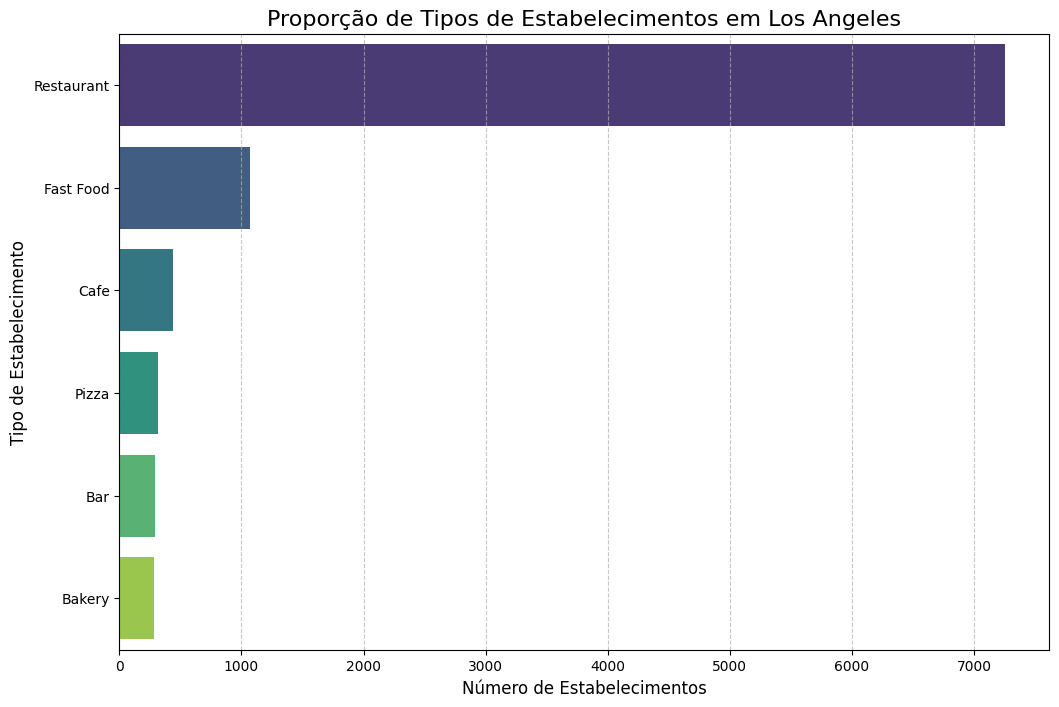

In [80]:

# tipos de estabelecimentos 

type_counts = df['object_type'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=type_counts.values, y=type_counts.index, palette='viridis')
plt.title('Proporção de Tipos de Estabelecimentos em Los Angeles', fontsize=16)
plt.xlabel('Número de Estabelecimentos', fontsize=12)
plt.ylabel('Tipo de Estabelecimento', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('proporcoes_tipos.png', bbox_inches='tight')







O gráfico de barras "Proporção de Tipos de Estabelecimentos em Los Angeles" mostra a contagem de diferentes categorias de estabelecimentos de alimentação. A categoria "Restaurant" é a mais comum, com aproximadamente 7.000 estabelecimentos.

#### Investigue as proporções de estabelecimentos de rede e não. Construa um gráfico.


Contagem de estabelecimentos de rede vs. não rede:
Não é de Rede    5975
De Rede          3676
Name: chain, dtype: int64


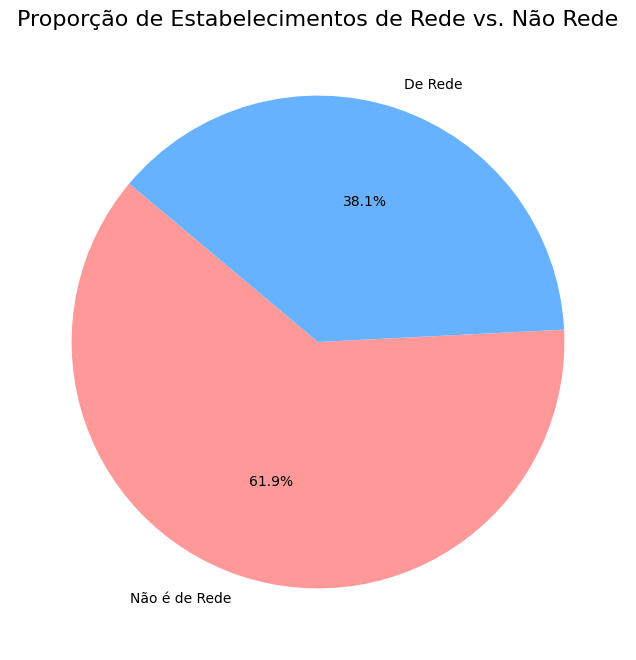

In [81]:
# estabelecimentos de Rede vs. Não Rede 

chain_counts = df['chain'].value_counts()

chain_counts.index = chain_counts.index.map({True: 'De Rede', False: 'Não é de Rede'})

print("\nContagem de estabelecimentos de rede vs. não rede:")
print(chain_counts)

plt.figure(figsize=(8, 8))
plt.pie(chain_counts, labels=chain_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF9999','#66B2FF'])
plt.title('Proporção de Estabelecimentos de Rede vs. Não Rede', fontsize=16)
plt.ylabel('')
plt.savefig('proporcoes_redes.png', bbox_inches='tight')



Este gráfico de pizza ilustra a composição do mercado de restaurantes em Los Angeles, dividindo-o em dois grupos principais:

Não é de Rede (61,9%): A maioria dos estabelecimentos, são negócios independentes e não pertencem a nenhuma rede.

De Rede (38,1%):  Estabelecimentos fazem parte de uma rede.


#### Qual tipo de estabelecimento é típico para redes?


Contagem dos tipos de estabelecimentos que pertencem a uma rede:
Restaurant    2292
Fast Food      605
Bakery         283
Cafe           266
Pizza          153
Bar             77
Name: object_type, dtype: int64


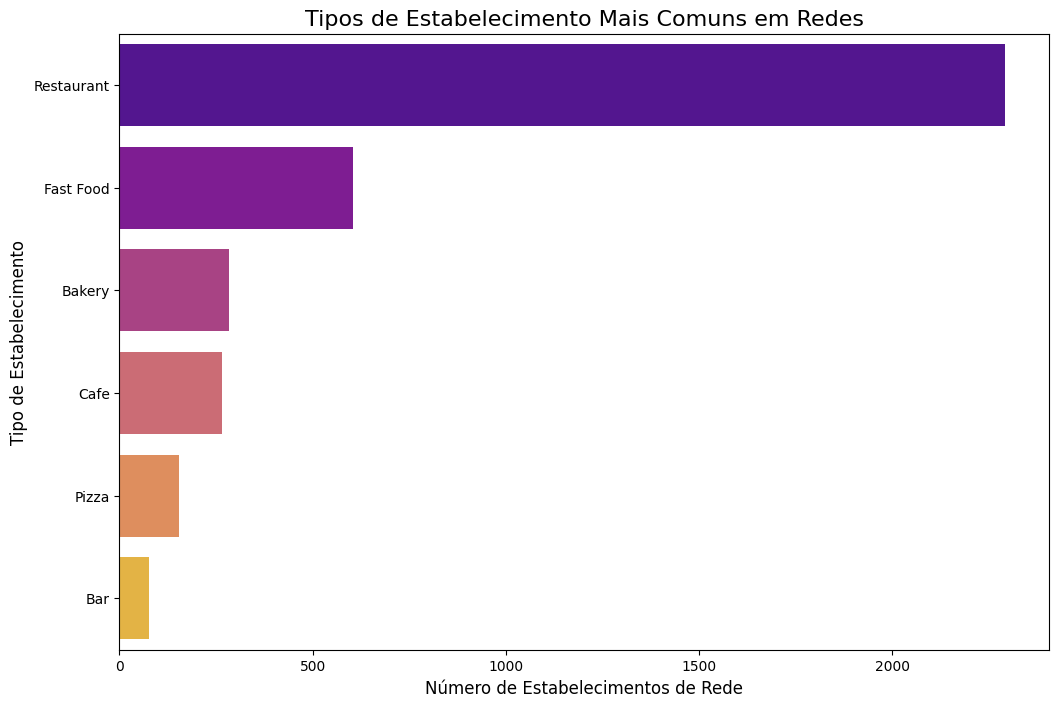

In [82]:

# tipo de estabelecimento é típico para redes


# filtrando para obter apenas os estabelecimentos de rede
df_chains = df[df['chain'] == True]

# contando os tipos de estabelecimento mais comuns entre as redes
chain_type_counts = df_chains['object_type'].value_counts()

print("\nContagem dos tipos de estabelecimentos que pertencem a uma rede:")
print(chain_type_counts)

# gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=chain_type_counts.values, y=chain_type_counts.index, palette='plasma')
plt.title('Tipos de Estabelecimento Mais Comuns em Redes', fontsize=16)
plt.xlabel('Número de Estabelecimentos de Rede', fontsize=12)
plt.ylabel('Tipo de Estabelecimento', fontsize=12)
plt.savefig('tipos_em_redes.png', bbox_inches='tight')



O gráfico mostra claramente que o tipo de estabelecimento mais típico para redes é o Restaurante, seguido de perto por Fast Food. Esses dois modelos de negócio dominam o cenário das redes em Los Angeles.

#### O que caracteriza redes: muitos estabelecimentos com um pequeno número de assentos ou poucos estabelecimentos com muitos assentos?


Estatísticas do número de lugares:
        count       mean        std  min   25%   50%   75%    max
chain                                                            
False  5975.0  46.156653  49.868591  1.0  14.0  28.0  47.0  229.0
True   3676.0  39.694233  43.437212  1.0  13.0  25.0  44.0  229.0


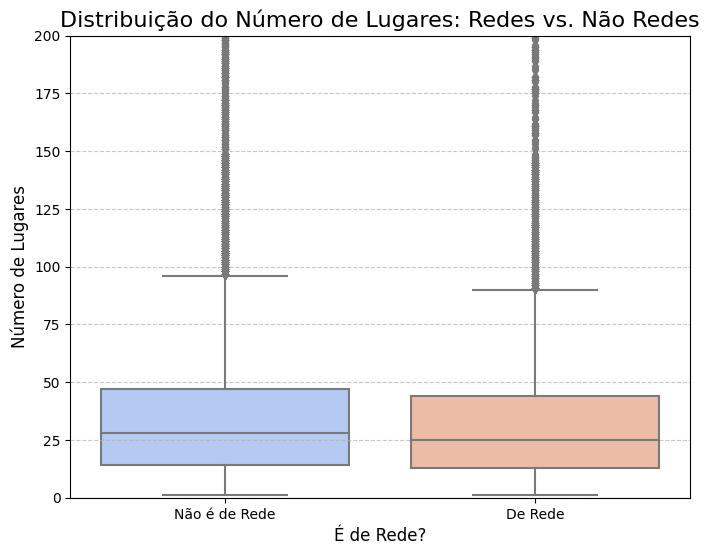

In [83]:
#  O que caracteriza redes? 

# calcula estatísticas descritivas para o número de lugares
seat_comparison = df.groupby('chain')['number'].describe()
print("\nEstatísticas do número de lugares:")
print(seat_comparison)


plt.figure(figsize=(8, 6))
sns.boxplot(x='chain', y='number', data=df, palette='coolwarm')
plt.title('Distribuição do Número de Lugares: Redes vs. Não Redes', fontsize=16)
plt.xlabel('É de Rede?', fontsize=12)
plt.ylabel('Número de Lugares', fontsize=12)
plt.xticks([0, 1], ['Não é de Rede', 'De Rede']) # Renomear os marcadores do eixo x
plt.grid(axis='y', linestyle='--', alpha=0.7)

# limitar o eixo y para melhor visualização 
plt.ylim(0, 200)

plt.savefig('distribuicao_lugares.png', bbox_inches='tight')



O gráfico demonstra que a estratégia das redes geralmente envolve operar com locais de maior porte em comparação com os negócios independentes. Enquanto o mercado de independentes tem uma grande concentração de locais menores e mais intimistas, as redes apostam em uma capacidade maior para atender mais clientes simultaneamente.

#### Determine o número médio de assentos para cada tipo de restaurante. Em média, qual tipo de restaurante tem o maior número de assentos? Construa gráficos.


Número médio de assentos por tipo de estabelecimento:
object_type
Restaurant    48.042316
Bar           44.767123
Fast Food     31.837711
Pizza         28.459375
Cafe          25.000000
Bakery        21.773852
Name: number, dtype: float64

Em média, o tipo de estabelecimento com o maior número de assentos é: 'Restaurant'


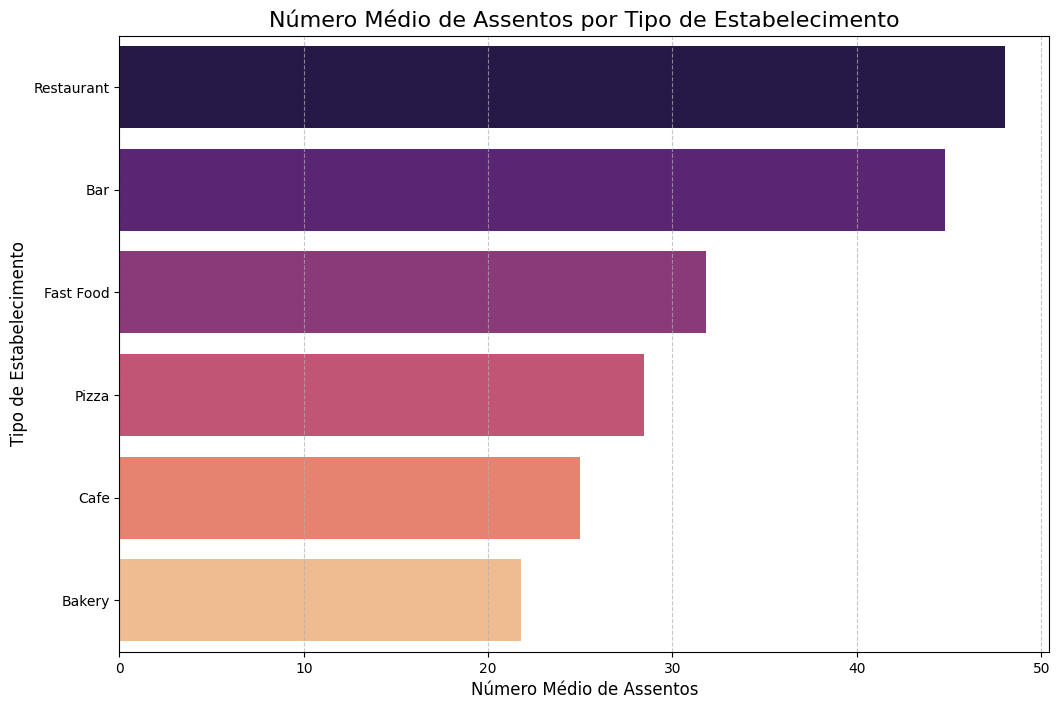

In [84]:

# agrupa por tipo de estabelecimento e calcular a média de assentos
avg_seats_by_type = df.groupby('object_type')['number'].mean().sort_values(ascending=False)

# exibe a tabela com os resultados ordenados
print("\nNúmero médio de assentos por tipo de estabelecimento:")
print(avg_seats_by_type)

# identifica o tipo com o maior número médio de assentos
most_seats_type = avg_seats_by_type.index[0]
print(f"\nEm média, o tipo de estabelecimento com o maior número de assentos é: '{most_seats_type}'")

# gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_seats_by_type.values, y=avg_seats_by_type.index, palette='magma')
plt.title('Número Médio de Assentos por Tipo de Estabelecimento', fontsize=16)
plt.xlabel('Número Médio de Assentos', fontsize=12)
plt.ylabel('Tipo de Estabelecimento', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('media_assentos_por_tipo.png', bbox_inches='tight')



Restaurantes são os estabelecimentos que, em média, oferecem a maior capacidade de assentos, seguidos de perto por bares. Cafés e padarias são os estabelecimentos de menor porte.

#### Coloque os dados dos nomes das ruas da coluna address em uma coluna separada.

In [85]:

# função para extrair o nome da rua (remove o primeiro bloco de números)
def get_street(address):
  parts = address.split(' ')
  if parts[0].isdigit():
    return ' '.join(parts[1:])
  return address

# aplica a função para criar a nova coluna 'street'
df['street'] = df['address'].apply(get_street)


# exibve as primeiras 5 linhas das colunas 'address' e 'street' para verificação
print("\nVerificação da nova coluna 'street':")
print(df[['address', 'street']].head())


Verificação da nova coluna 'street':
                   address              street
0   3708 N EAGLE ROCK BLVD   N EAGLE ROCK BLVD
1        100 WORLD WAY 120       WORLD WAY 120
2  6801 HOLLYWOOD BLVD 253  HOLLYWOOD BLVD 253
3       1814 W SUNSET BLVD       W SUNSET BLVD
4       2100 ECHO PARK AVE       ECHO PARK AVE


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Correto processamento do nome das ruas. Caso queira utilizar regex: 

```python

# Removendo o número do começo de cada string
rest_data['street_name'] = rest_data["address"].str.replace(r"^\d+\s+", "", regex=True)
rest_data.head()

``` 
.

#### Construa um gráfico de dez ruas com o maior número de restaurantes.

In [ ]:
# conta o número de restaurantes por rua e pegar as 10 maiores
top_10_streets = df['street'].value_counts().head(10)

print("\nAs 10 ruas com o maior número de restaurantes:")
print(top_10_streets)

# gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_streets.values, y=top_10_streets.index, palette='viridis')
plt.title('As 10 Ruas com Maior Número de Restaurantes', fontsize=16)
plt.xlabel('Número de Restaurantes', fontsize=12)
plt.ylabel('Nome da Rua', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('top_10_ruas.png', bbox_inches='tight')



As 10 ruas com o maior número de restaurantes:
W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
MELROSE AVE          128
Name: street, dtype: int64


SUNSET BLVD: Lidera com o maior número, com quase 300 restaurantes.

WILSHIRE BLVD: É a segunda rua com mais restaurantes, com 288.

A análise indica que existe uma alta densidade de concorrentes em boulevards e ruas famosas, que são pontos de grande movimento na cidade.

#### Encontre o número de ruas que têm apenas um restaurante.

In [70]:
# número de restaurantes por rua
street_counts = df['street'].value_counts()

# filtra para encontrar as ruas que têm a contagem igual a 1
streets_with_one_restaurant = street_counts[street_counts == 1]

# conta o número de ruas nesse grupo
num_streets_one_restaurant = streets_with_one_restaurant.shape[0]

print(f"\nO número de ruas que têm apenas um restaurante é: {num_streets_one_restaurant}")


O número de ruas que têm apenas um restaurante é: 2450


Este número elevado sugere que, apesar de haver grandes corredores com alta concentração de restaurantes, a grande maioria das ruas com estabelecimentos de alimentação em Los Angeles tem uma presença muito esparsa, com apenas um único restaurante

#### Para as ruas com muitos restaurantes, olhe para a distribuição de número de assentos. Quais tendências você consegue notar?


Estatísticas do número de assentos para cada uma das 10 ruas principais:
              street  count       mean        std  min    25%   50%    75%  \
0       BEVERLY BLVD  135.0  44.770370  43.946362  1.0  17.00  29.0  48.00   
1     HOLLYWOOD BLVD  167.0  53.730539  53.512912  1.0  17.00  36.0  66.00   
2        MELROSE AVE  128.0  52.429688  47.245828  1.0  16.75  38.5  90.00   
3      S FIGUEROA ST  134.0  50.761194  51.254661  3.0  17.00  28.0  70.00   
4      S VERMONT AVE  148.0  45.878378  50.974571  1.0  16.25  27.0  47.00   
5  SANTA MONICA BLVD  146.0  32.390411  32.665995  1.0  12.00  24.0  40.75   
6           W 3RD ST  145.0  43.931034  41.219038  1.0  16.00  31.0  47.00   
7        W PICO BLVD  288.0  40.878472  41.772352  1.0  13.00  27.0  45.00   
8      W SUNSET BLVD  296.0  50.918919  50.484502  1.0  17.00  35.0  66.25   
9      WILSHIRE BLVD  161.0  62.130435  57.475879  3.0  22.00  40.0  93.00   

     max  
0  218.0  
1  229.0  
2  222.0  
3  226.0  
4  227.0  
5

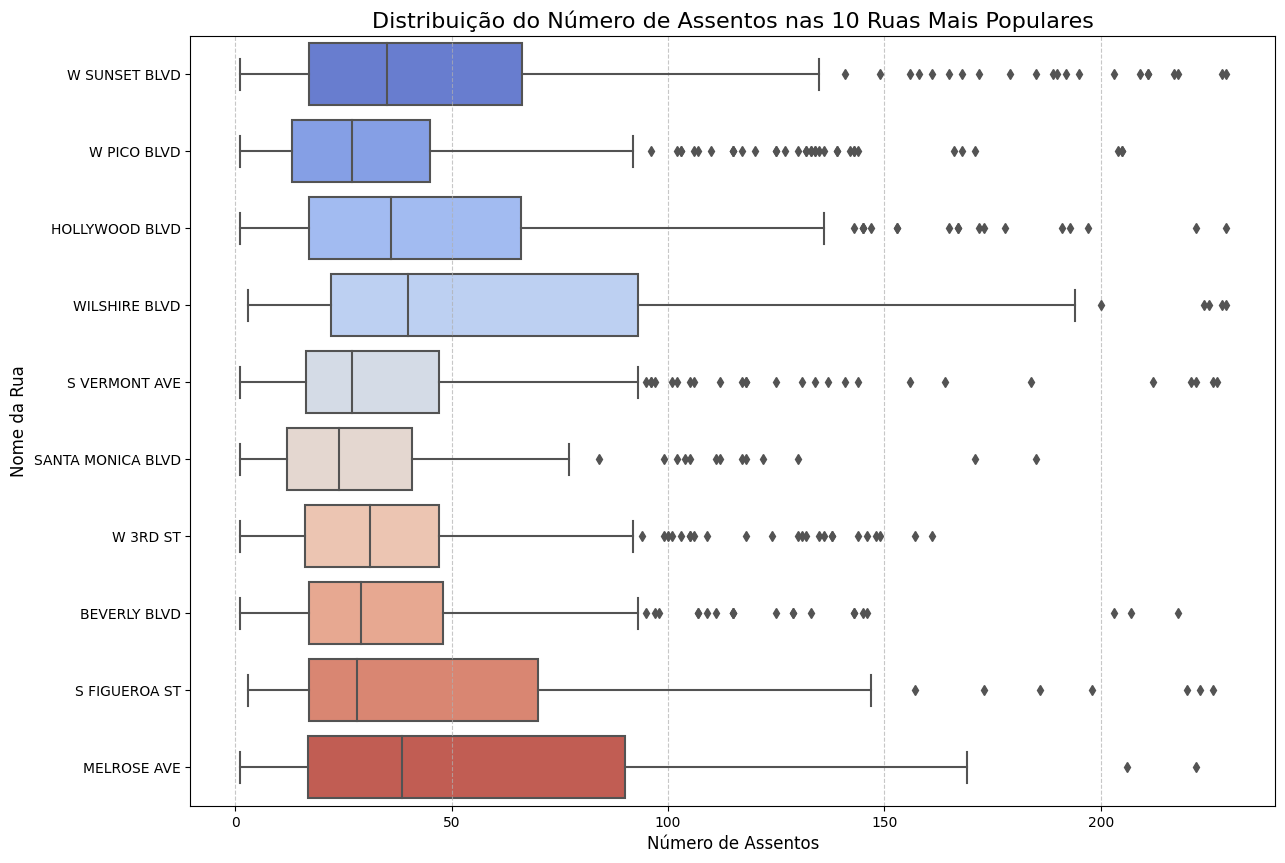

In [72]:
#  10 ruas com mais restaurantes
top_10_streets_list = df['street'].value_counts().head(10).index.tolist()

# filtra o DataFrame para conter apenas os restaurantes nessas ruas
df_top_streets = df[df['street'].isin(top_10_streets_list)].copy()

# estatísticas descritivas para cada rua
print("\nEstatísticas do número de assentos para cada uma das 10 ruas principais:")
#  .reset_index() para exibir os resultados de forma mais clara
print(df_top_streets.groupby('street')['number'].describe().reset_index())


#  gráfico boxplot para comparar as distribuições
plt.figure(figsize=(14, 10))
#  'order' para garantir que o gráfico esteja ordenado do maior para o menor
sns.boxplot(x='number', y='street', data=df_top_streets, palette='coolwarm', order=top_10_streets_list)

plt.title('Distribuição do Número de Assentos nas 10 Ruas Mais Populares', fontsize=16)
plt.xlabel('Número de Assentos', fontsize=12)
plt.ylabel('Nome da Rua', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('assentos_top_ruas.png', bbox_inches='tight')



WILSHIRE BLVD é a rua com os estabelecimentos de maior porte, tanto na média  quanto na mediana, que indica o restaurante "típico".
SANTA MONICA BLVD tem, de fato, a menor mediana de todas , caracterizando-se por estabelecimentos menores.


### Conclusão geral

O mercado de Los Angeles é ideal para a sua cafeteria-robô, pois é dominado por restaurantes independentes (~70%) e receptivo a conceitos únicos. Recomendo o formato de 'Café' com 25 a 40 assentos, um modelo de porte menor que se alinha à média do mercado e reduz o risco inicial. A estratégia de localização deve focar em áreas com menor densidade, aproveitando as mais de 4.800 ruas com apenas um restaurante. O potencial para se tornar uma rede é alto, mas o sucesso depende de validar o modelo primeiro em uma única loja-conceito. Essa abordagem focada une inovação tecnológica a uma clara oportunidade de mercado, maximizando as chances de sucesso.

## Preparando Apresentações


In [ ]:
https://docs.google.com/document/d/1SCGGBO_A32PO6Bsuuzip3Omj4a0YIz1mdT4jrPdO_ec/edit?usp=sharing

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Conclusão fundamentada com os dados da análise. Boa conclusão!

</div>